In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def calcularDistanciaConSignoPuntoAHiperplano(listaCoeficientesCompletosHiperplanoSeparacion, puntoMuestra, numeroDimensiones):
    return (np.dot(listaCoeficientesCompletosHiperplanoSeparacion[0:numeroDimensiones], puntoMuestra) + listaCoeficientesCompletosHiperplanoSeparacion[numeroDimensiones]) / np.linalg.norm(listaCoeficientesCompletosHiperplanoSeparacion[0:numeroDimensiones])

def evaluarPuntoRespectoAHiperplano(listaCoeficientesCompletosHiperplanoSeparacion, puntoMuestra, numeroDimensiones):
    return np.dot(listaCoeficientesCompletosHiperplanoSeparacion[0:numeroDimensiones], puntoMuestra) + listaCoeficientesCompletosHiperplanoSeparacion[numeroDimensiones]

def generarPuntosMuestra(numeroMuestrasClase1, numeroMuestrasClase2, nombreClase1, nombreClase2, listaCoeficientesCompletosHiperplanoSeparacion, minimoValorAbscisas, maximoValorAbscisas, numeroDimensiones, margenMinimoSeparacionEntreClases = 1.0):
    muestraPuntos = []
    muestraPuntosPorClases = {nombreClase1: [], nombreClase2: []}
    
    #Se generan los puntos de la primera clase (Se tienen como restricciones que esten a distancia del hiperplano mayor al margen y este por encima del hiperplano, ademas que el punto no se repita)
    for indice in range(numeroMuestrasClase1):
        puntoMuestraValido = False
        while puntoMuestraValido == False:
            puntoGenerado = list(np.random.uniform(low = minimoValorAbscisas, high = maximoValorAbscisas, size = numeroDimensiones))
            distanciaPuntoHiperplano = calcularDistanciaConSignoPuntoAHiperplano(listaCoeficientesCompletosHiperplanoSeparacion, puntoGenerado, numeroDimensiones)
            if distanciaPuntoHiperplano > margenMinimoSeparacionEntreClases and puntoGenerado not in muestraPuntosPorClases[nombreClase1]:
                muestraPuntos.append(puntoGenerado)
                muestraPuntosPorClases[nombreClase1].append(puntoGenerado)
                puntoMuestraValido = True
    
    #Se generan los puntos de la segunda clase (Se tienen como restricciones que esten a distancia del hiperplano mayor al margen y este por debajo del hiperplano, ademas que el punto no se repita)
    for indice in range(numeroMuestrasClase2):
        puntoMuestraValido = False
        while puntoMuestraValido == False:
            puntoGenerado = list(np.random.uniform(low = minimoValorAbscisas, high = maximoValorAbscisas, size = numeroDimensiones))
            distanciaPuntoHiperplano = calcularDistanciaConSignoPuntoAHiperplano(listaCoeficientesCompletosHiperplanoSeparacion, puntoGenerado, numeroDimensiones)
            if distanciaPuntoHiperplano < -margenMinimoSeparacionEntreClases and puntoGenerado not in muestraPuntosPorClases[nombreClase2]:
                muestraPuntos.append(puntoGenerado)
                muestraPuntosPorClases[nombreClase2].append(puntoGenerado)
                puntoMuestraValido = True
    return muestraPuntos, muestraPuntosPorClases

def verificarMuestrasClasificadasEnUnaSolaClase(muestraPuntosPorClases, claseObjetivo, listaCoeficientesCompletosHiperplano, numeroDimensiones):
    numeroPuntosConSignoPositivo = 0
    numeroPuntosConSignoNegativo = 0
    for punto in muestraPuntosPorClases[claseObjetivo]:
        valorPunto = np.dot(listaCoeficientesCompletosHiperplano[0:(numeroDimensiones - 1)], punto[0:(numeroDimensiones - 1)]) + listaCoeficientesCompletosHiperplano[numeroDimensiones - 1]
        if valorPunto == 0.0:
            return False
        elif np.sign(valorPunto) == 1.0:
            numeroPuntosConSignoPositivo += 1
        else:
            numeroPuntosConSignoNegativo += 1
    
    if (numeroPuntosConSignoPositivo > 0 and numeroPuntosConSignoNegativo == 0) or (numeroPuntosConSignoPositivo == 0 and numeroPuntosConSignoNegativo > 0):
        return True
    return False

def obtenerListasCoordenadasRespectivas(listaPuntos, numeroDimensiones):
    diccionarioPuntosPorCoordenadas = {}
    for indice in range(numeroDimensiones):
        diccionarioPuntosPorCoordenadas[indice] = []
        
    for puntoActual in listaPuntos:
        for indice in range(numeroDimensiones):
            coordenadaActual = puntoActual[indice]
            diccionarioPuntosPorCoordenadas[indice].append(coordenadaActual)
    return diccionarioPuntosPorCoordenadas

#Algoritmo de clasificacion para 2 clases linealmente separables
#def algoritmoPerceptronSimple(muestra, clase1, clase2, listaInicialCoeficientesCompletosHiperplano, alfa):
def algoritmoPerceptronSimple(listaPuntosMuestra, muestraPuntosPorClases, listaInicialCoeficientesCompletosHiperplano, tasaAprendizaje, numeroDimensiones):
    w1 = np.random.rand()
    w2 = np.random.rand()
    b = np.random.rand()
    while w1 == 0 or w2 == 0 or b == 0:
        w1 = np.random.rand()
        w2 = np.random.rand()
        b = np.random.rand()
    listaCoeficientesCompletosHiperplano = listaInicialCoeficientesCompletosHiperplano
    
    #alfa = 0.001 #tasa de aprendizaje
    plt.ion()
    plt.show()
    numeroPasos = 1
    while True:
        plt.clf()
        parejaSeleccionada = listaPuntosMuestra[np.random.randint(len(listaPuntosMuestra))]
        #z = w1 * parejaSeleccionada[0] + w2 * parejaSeleccionada[1] + b
        z = evaluarPuntoRespectoAHiperplano(listaCoeficientesCompletosHiperplano, parejaSeleccionada, numeroDimensiones)
        if not ((parejaSeleccionada in muestraPuntosPorClases["Clase 1"] and z >= 0) or (parejaSeleccionada in muestraPuntosPorClases["Clase 2"] and z < 0)):
            if z < 0 and parejaSeleccionada in muestraPuntosPorClases["Clase 1"]:
                listaCoeficientesCompletosHiperplano[0:numeroDimensiones] = (1 + tasaAprendizaje) * listaCoeficientesCompletosHiperplano[0:numeroDimensiones]
                listaCoeficientesCompletosHiperplano[numeroDimensiones] += tasaAprendizaje
                #w1 += alfa * parejaSeleccionada[0]
                #w2 += alfa * parejaSeleccionada[1]
                #b += alfa
            else:
                if z >= 0 and parejaSeleccionada in muestraPuntosPorClases["Clase 2"]:
                    listaCoeficientesCompletosHiperplano[0:numeroDimensiones] = (1 - tasaAprendizaje) * listaCoeficientesCompletosHiperplano[0:numeroDimensiones]
                    listaCoeficientesCompletosHiperplano[numeroDimensiones] -= tasaAprendizaje
                    #w1 -= alfa * parejaSeleccionada[0]
                    #w2 -= alfa * parejaSeleccionada[1]
                    #b -= alfa
                    
        #listaPuntosPorCoordenadasRespectivas = obtenerListasCoordenadas(listaPuntos, numeroDimensiones)
        listaPuntosClase1PorCoordenadasRespectivas = obtenerListasCoordenadas(muestraPuntosPorClases[nombreClase1], numeroDimensiones)
        listaPuntosClase2PorCoordenadasRespectivas = obtenerListasCoordenadas(muestraPuntosPorClases[nombreClase2], numeroDimensiones)
        obtenerListasCoordenadas(muestraPuntosPorClases[nombreClase2], numeroDimensiones)
        #x1, y1 = separarPuntosPorListasDeCoordenadas(muestraPuntosPorClases, "Clase 1")
        #x2, y2 = separarPuntosPorListasDeCoordenadas(muestraPuntosPorClases, "Clase 2")
        x1 = listaPuntosClase1PorCoordenadasRespectivas[0]
        y1 = listaPuntosClase1PorCoordenadasRespectivas[1]
        x2 = listaPuntosClase2PorCoordenadasRespectivas[0]
        y2 = listaPuntosClase2PorCoordenadasRespectivas[1]
        plt.plot(x1, y1, 'bo', label = 'Clase 1 de muestra')
        plt.plot(x2, y2, 'ro', label = 'Clase 2 de muestra')
        listaDeValoresEjeIndependiente = np.arange(minimoEjeX, maximoEjeX, 0.01)
        if listaCoeficientesCompletosHiperplano[numeroDimensiones - 1] != 0:
            plt.plot(listaDeValoresEjeIndependiente, -(listaCoeficientesCompletosHiperplano[numeroDimensiones - 2] * listaDeValoresEjeIndependiente + listaCoeficientesCompletosHiperplano[numeroDimensiones]) / listaCoeficientesCompletosHiperplano[numeroDimensiones - 1], 'g-', label = "Frontera de Decision propuesta por el algoritmo")
        elif listaCoeficientesCompletosHiperplano[numeroDimensiones - 2] != 0:
            #plt.plot(listaDeValoresEjeIndependiente, -(w1 * listaDeValoresEjeIndependiente + b) / w2, 'g-', label = "Frontera de Decision propuesta por el algoritmo")
            c = 0
        plt.legend(loc = 'upper left')
        plt.xlabel('Eje X')
        plt.ylabel('Eje Y')
        plt.title('Visualizacion de la recta que proporciona el algoritmo')
        #plt.xlim(minimoEjeX, maximoEjeX)
        #plt.ylim(minimoEjeY, maximoEjeY)
        plt.grid(True)
        plt.pause(tiempoPausa)
        #revisionClasificacion1 = revisarClasificacionLineal(clases, '1', w1, w2, b)
        #revisionClasificacion2 = revisarClasificacionLineal(clases, '2', w1, w2, b)
        revisionClasificacion1 = verificarMuestrasClasificadasEnUnaSolaClase(muestraPuntosPorClases, "Clase 1", listaCoeficientesCompletosHiperplano, numeroDimensiones)
        revisionClasificacion2 = verificarMuestrasClasificadasEnUnaSolaClase(muestraPuntosPorClases, "Clase 2", listaCoeficientesCompletosHiperplano, numeroDimensiones)
        numeroPasos += 1
        #if revisionClasificacion1 != 0 and revisionClasificacion2 != 0 and revisionClasificacion1 != revisionClasificacion2:
        if revisionClasificacion1 == True and revisionClasificacion2 == True:
            print("Fue(ron) necesario(s)", numeroPasos, "paso(s) para obtener una recta de clasificacion")
            print("La recta de clasificacion que proporciona el algoritmo es " + str(w1) + "x + " + str(w2) + "y + " + str(b) + " = 0")
            break
    plt.ioff()
    plt.show()

In [3]:
tiempoPausa = 0.001
tasaAprendizaje = 0.001
minimoEjeX = -15.0
maximoEjeX = 15.0
numeroDimensiones = 3
listaCoeficientesPrincipalesHiperplanoBase = [1.0] * numeroDimensiones
listaCoeficientesPrincipalesHiperplanoBase = [5.0, 0.0, 0.0]
coeficienteInterceptoHiperplanoBase = -8.0
nombreClase1 = "Clase 1"
nombreClase2 = "Clase 2"
margenMinimoSeparacionEntreClases = 1.0
numeroMuestrasClase1 = 100
numeroMuestrasClase2 = 100

In [4]:
listaCoeficientesCompletosHiperplanoBase = listaCoeficientesPrincipalesHiperplanoBase + [coeficienteInterceptoHiperplanoBase]
listaPuntosMuestra, muestraPuntosPorClases = generarPuntosMuestra(numeroMuestrasClase1, numeroMuestrasClase2, nombreClase1, nombreClase2, listaCoeficientesCompletosHiperplanoBase, minimoEjeX, maximoEjeX, numeroDimensiones, margenMinimoSeparacionEntreClases = margenMinimoSeparacionEntreClases)

In [5]:
listaCoeficientesCompletosHiperplanoBase = list(np.random.uniform(low = -10, high = 10, size = numeroDimensiones + 1))
while listaCoeficientesCompletosHiperplanoBase[0:numeroDimensiones] == [0] * numeroDimensiones:
    listaCoeficientesCompletosHiperplanoBase = list(np.random.uniform(low = -10, high = 10, size = numeroDimensiones + 1))

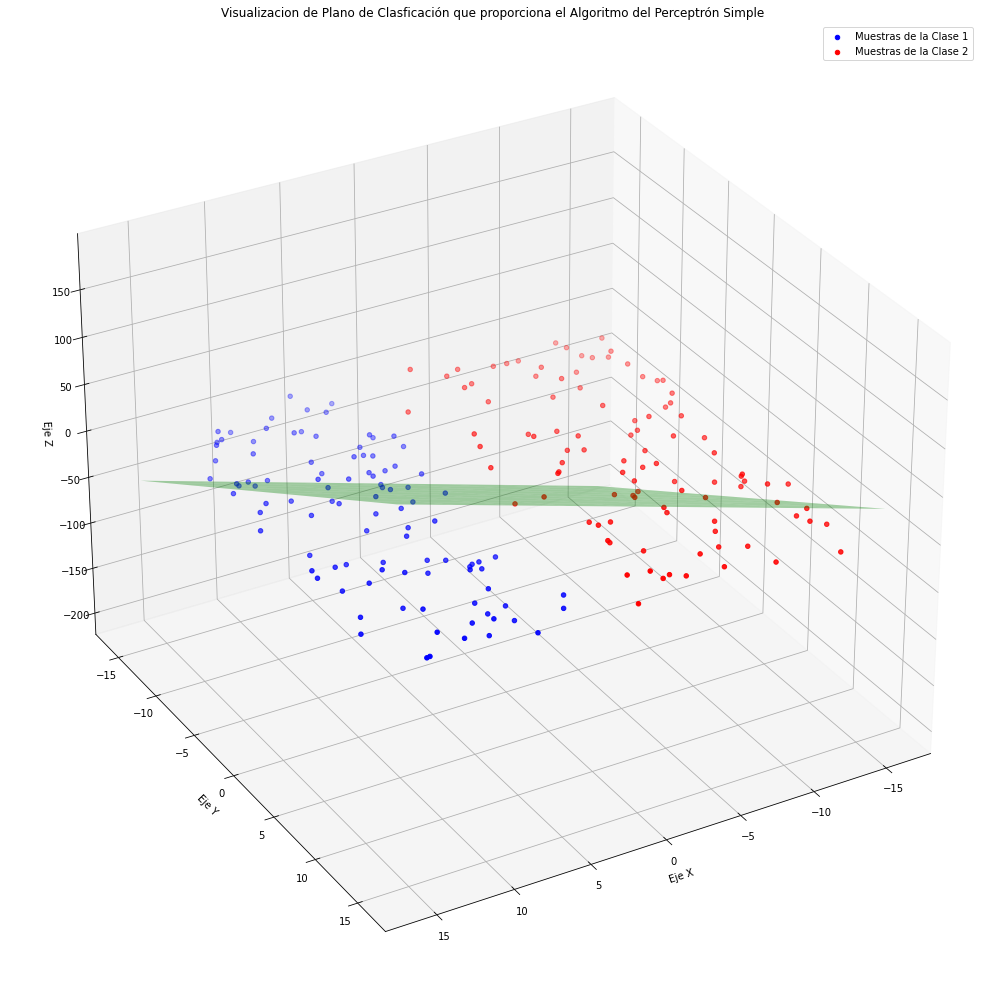

In [6]:
listaPuntosClase1PorCoordenadasRespectivas = obtenerListasCoordenadasRespectivas(muestraPuntosPorClases[nombreClase1], numeroDimensiones)
listaPuntosClase2PorCoordenadasRespectivas = obtenerListasCoordenadasRespectivas(muestraPuntosPorClases[nombreClase2], numeroDimensiones)
valoresCoordenadasXPuntosClase1 = listaPuntosClase1PorCoordenadasRespectivas[0]
valoresCoordenadasXPuntosClase2 = listaPuntosClase2PorCoordenadasRespectivas[0]
valoresCoordenadasYPuntosClase1 = None
valoresCoordenadasYPuntosClase2 = None
valoresCoordenadasZPuntosClase1 = None
valoresCoordenadasZPuntosClase2 = None
minimoEjeX = np.min(valoresCoordenadasXPuntosClase1 + valoresCoordenadasXPuntosClase2) - 1
maximoEjeX = np.max(valoresCoordenadasXPuntosClase1 + valoresCoordenadasXPuntosClase2) + 1
minimoEjeY = None
maximoEjeY = None
minimoEjeZ = None
maximoEjeZ = None

numeroMuestrasHiperplanoClasificacion = 10
if numeroDimensiones == 2:
    valoresCoordenadasYPuntosClase1 = listaPuntosClase1PorCoordenadasRespectivas[1]
    valoresCoordenadasYPuntosClase2 = listaPuntosClase2PorCoordenadasRespectivas[1]
    minimoEjeY = np.min(valoresCoordenadasYPuntosClase1 + valoresCoordenadasYPuntosClase2) - 1
    maximoEjeY = np.max(valoresCoordenadasYPuntosClase1 + valoresCoordenadasYPuntosClase2) + 1
elif numeroDimensiones == 3:
    valoresCoordenadasYPuntosClase1 = listaPuntosClase1PorCoordenadasRespectivas[1]
    valoresCoordenadasYPuntosClase2 = listaPuntosClase2PorCoordenadasRespectivas[1]
    valoresCoordenadasZPuntosClase1 = listaPuntosClase1PorCoordenadasRespectivas[2]
    valoresCoordenadasZPuntosClase2 = listaPuntosClase2PorCoordenadasRespectivas[2]
    minimoEjeY = np.min(valoresCoordenadasYPuntosClase1 + valoresCoordenadasYPuntosClase2) - 1
    maximoEjeY = np.max(valoresCoordenadasYPuntosClase1 + valoresCoordenadasYPuntosClase2) + 1
    minimoEjeZ = np.min(valoresCoordenadasZPuntosClase1 + valoresCoordenadasZPuntosClase2) - 1
    maximoEjeZ = np.max(valoresCoordenadasZPuntosClase1 + valoresCoordenadasZPuntosClase2) + 1

if numeroDimensiones == 2:
    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoClasificacion)
    listaValoresCoordenadaYHiperplanoBase = np.linspace(minimoEjeY, maximoEjeY, num = numeroMuestrasHiperplanoClasificacion)
    if listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 1] != 0.0:
        listaValoresCoordenadaYHiperplanoBase = -(listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 2] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesCompletosHiperplanoBase[numeroDimensiones]) / listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 1]
    elif listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 2] != 0.0:
        listaValoresCoordenadaXHiperplanoBase = [-listaCoeficientesCompletosHiperplanoBase[numeroDimensiones] / listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 2]] * numeroMuestrasHiperplanoClasificacion

    plt.figure(figsize = (15, 14))
    plt.plot(valoresCoordenadasXPuntosClase1, valoresCoordenadasYPuntosClase1, 'bo', label = "Muestras de la Clase 1")
    plt.plot(valoresCoordenadasXPuntosClase2, valoresCoordenadasYPuntosClase2, 'ro', label = "Muestras de la Clase 2")
    plt.plot(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, 'g-', label = "Frontera de Decision (Algoritmo del Perceptrón Simple)")
    plt.legend(loc = 'upper left')
    plt.xlabel("Eje X")
    plt.ylabel("Eje Y")
    plt.title("Visualizacion de Recta de Clasficación que proporciona el Algoritmo del Perceptrón Simple")
    plt.grid(True)
    plt.show()
elif numeroDimensiones == 3:
    listaValoresCoordenadaXHiperplanoBase = np.linspace(minimoEjeX, maximoEjeX, num = numeroMuestrasHiperplanoClasificacion)
    listaValoresCoordenadaYHiperplanoBase = np.linspace(minimoEjeY, maximoEjeY, num = numeroMuestrasHiperplanoClasificacion)
    listaValoresCoordenadaZHiperplanoBase = np.linspace(minimoEjeZ, maximoEjeZ, num = numeroMuestrasHiperplanoClasificacion)
    if listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 1] != 0.0:
        listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase = np.meshgrid(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase)
        listaValoresCoordenadaZHiperplanoBase = -(listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 3] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 2] * listaValoresCoordenadaYHiperplanoBase + listaCoeficientesCompletosHiperplanoBase[numeroDimensiones]) / listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 1]
    elif listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 2] != 0.0:
        listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaZHiperplanoBase = np.meshgrid(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaZHiperplanoBase)
        listaValoresCoordenadaYHiperplanoBase = -(listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 3] * listaValoresCoordenadaXHiperplanoBase + listaCoeficientesCompletosHiperplanoBase[numeroDimensiones]) / listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 2]
    elif listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 3] != 0.0:
        listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase = np.meshgrid(listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase)
        listaValoresCoordenadaXHiperplanoBase = [-listaCoeficientesCompletosHiperplanoBase[numeroDimensiones] / listaCoeficientesCompletosHiperplanoBase[numeroDimensiones - 3]] * numeroMuestrasHiperplanoClasificacion
    
    fig = plt.figure(figsize = (15, 14))
    ax = fig.add_subplot(111, projection = '3d')
    ax.view_init(elev = 30, azim = 60)
    ax.scatter(valoresCoordenadasXPuntosClase1, valoresCoordenadasYPuntosClase1, valoresCoordenadasZPuntosClase1, c = 'b', marker = 'o', label = "Muestras de la Clase 1")
    ax.scatter(valoresCoordenadasXPuntosClase2, valoresCoordenadasYPuntosClase2, valoresCoordenadasZPuntosClase2, c = 'r', marker = 'o', label = "Muestras de la Clase 2")
    ax.plot_surface(listaValoresCoordenadaXHiperplanoBase, listaValoresCoordenadaYHiperplanoBase, listaValoresCoordenadaZHiperplanoBase, color = 'g', alpha = 0.35)
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.set_zlabel("Eje Z")
    plt.title("Visualizacion de Plano de Clasficación que proporciona el Algoritmo del Perceptrón Simple")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [7]:
#algoritmoPerceptronSimple(listaPuntosMuestra, muestraPuntosPorClases, listaCoeficientesCompletosHiperplanoBase, tasaAprendizaje, numeroDimensiones)